# Speech Recognition Using CNN

- Speech recognition is an interdisciplinary subfield of computer science and computational linguistics that develops methodologies and technologies that enable the recognition and translation of spoken language into text by computers. 
- It is also known as automatic speech recognition (ASR), computer speech recognition or speech to text (STT). It incorporates knowledge and research in the computer science, linguistics and computer engineering fields. 
- In this project we have to predict which word was pronounced by using Machine Learing.

# Dataset Description

- The dataset was downloaded from https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data?select=test.7z
- train.7z - Contains a few informational files and a folder of audio files. The audio folder contains subfolders with 1 second clips of voice commands, with the folder name being the label of the audio clip.
- This is a set of one-second .wav audio files, each containing a single spoken English word. These words are from a small set of commands, and are spoken by a variety of different speakers. 
- The audio files are organized into folders based on the word they contain, and this data set is designed to help train simple machine learning models.
- There are more labels that should be predicted. The labels you will need to predict in Test are yes, no, up, down, left, right, on, off, stop, go. Everything else should be considered either unknown or silence. The folder _background_noise_ contains longer clips of "silence" that you can break up and use as training input.

# For this Project

- For this Project due to limited resources we have considered only 9 classes out of all the sample voices from the training set.

# 1. Importing Dependencies

In [12]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing SKlearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing Keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, Add, Activation
from tensorflow.keras.layers import Convolution2D, MaxPool2D, AveragePooling2D, ZeroPadding2D, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from keras.utils import np_utils
from tensorflow.keras.models import load_model

# Importing Other Libraries
import os
import librosa
import IPython.display as ipd
from scipy.io import wavfile

# 2. Data Analysis & Preprocessing

In [16]:
training_dir = 'train_data/'

# Lets try to read one sample from the dataset
samples, sample_rate = librosa.load(training_dir+'bed/00176480_nohash_0.wav', sr = 16000)
ipd.Audio(samples, rate = sample_rate)

In [17]:
# Resampling the sample rate ro 8000
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate = 8000)

In [18]:
# Getting Labels from each folder
labels = os.listdir(training_dir)
labels

['bed', 'bird', 'cat', 'dog', 'eight', 'happy', 'right', 'stop', 'wow']

In [23]:
no_of_recordings = []

for label in labels:
    recs = [file for file in os.listdir(training_dir + '/' + label) if file.endswith('.wav')]
    no_of_recordings.append(len(recs))
    
no_of_recordings

[1699, 1711, 1710, 1746, 2352, 1719, 2367, 2380, 1745]

In [26]:
duration_of_recordings = []

for label in labels:
    recs = [file for file in os.listdir(training_dir + '/' + label) if file.endswith('.wav')]
    
    for rec in recs:
        sample_rate, samples = wavfile.read(training_dir + '/' + label + '/' + rec)
        duration_of_recordings.append(float(len(samples)/sample_rate))

Text(0.5, 1.0, 'Duration of Recordings vs Number of Recordings')

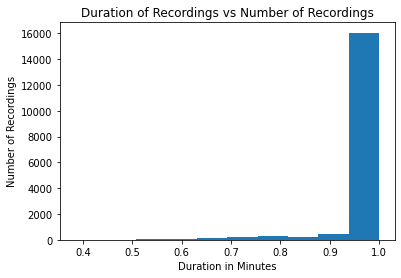

In [28]:
# Plotting Histogram for recordings
plt.hist(np.array(duration_of_recordings))
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Recordings')
plt.title('Duration of Recordings vs Number of Recordings')

In [29]:
# Resampling the Sample_Rate of each file from Original Series to Target Series in the dataset
all_recs = []
all_labels = []

for label in labels:
    recs = [file for file in os.listdir(training_dir + '/' + label) if file.endswith('.wav')]
    
    for rec in recs:
        samples, sample_rate = librosa.load(training_dir + '/' + label + '/' + rec, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        
        if(len(samples)== 8000) : 
            all_recs.append(samples)
            all_labels.append(label)

In [40]:
# Encode the Labels
le = LabelEncoder()
y = le.fit_transform(all_labels)
classes = list(le.classes_)
classes

['bed', 'bird', 'cat', 'dog', 'eight', 'happy', 'right', 'stop', 'wow']

In [41]:
# Preparing Data for Applying Deep Learning Models
y = np_utils.to_categorical(y, num_classes = len(labels)) # One Hot-Encode
final_data = np.array(all_recs).reshape(-1, 8000, 1)

In [43]:
print(y.shape)
print(final_data.shape)
print(type(y))
print(type(final_data))

(15508, 9)
(15508, 8000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
# Splitting the Data into Train & Test
x_train, x_val, y_train, y_val = train_test_split(np.array(final_data), np.array(y), stratify = y, test_size = 0.2,
                                                  random_state = 10, shuffle = True)

# 3. Modelling

In [45]:
# Initialising the Model_1
Model_1 = Sequential()

# Adding 1st Convolutional Layer
Model_1.add(Conv1D(filters = 8, kernel_size = 13, input_shape = (8000, 1), activation = 'relu', padding = 'valid'))
Model_1.add(MaxPooling1D(3))
Model_1.add(Dropout(0.3))

# Adding 2nd Convolutional Layer
Model_1.add(Conv1D(filters = 16, kernel_size = 13, activation = 'relu', padding = 'valid'))
Model_1.add(MaxPooling1D(3))
Model_1.add(Dropout(0.3))

# Adding 3rd Convolutional Layer
Model_1.add(Conv1D(filters = 32, kernel_size = 13, activation = 'relu', padding = 'valid'))
Model_1.add(MaxPooling1D(3))
Model_1.add(Dropout(0.3))

# Adding 4th Convolutional Layer
Model_1.add(Conv1D(filters = 64, kernel_size = 13, activation = 'relu', padding = 'valid'))
Model_1.add(MaxPooling1D(3))
Model_1.add(Dropout(0.3))

# Flattening
Model_1.add(Flatten())

# Full Connection
Model_1.add(Dense(128, activation = 'relu'))
Model_1.add(Dropout(0.40))

# Full Connection
Model_1.add(Dense(64, activation = 'relu'))
Model_1.add(Dropout(0.40))

# Output Layer
Model_1.add(Dense(len(labels), activation = 'softmax'))

Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2650, 16)          1680      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 883, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 883, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 871, 32)           6

In [46]:
# Compiling Model_1
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [47]:
# Early Stopping & Model Checkpointing For Better Performance
es = EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 10, min_delta = 0.0001) 
mc = ModelCheckpoint('Speech _Rec_Model_1.hdf5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [48]:
# Final Checks
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(12406, 8000, 1) (3102, 8000, 1) (12406, 9) (3102, 9)


In [49]:
# Training the Model_1
history = Model_1.fit(x_train, y_train, epochs = 100, callbacks = [es,mc], batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/100
388/388 [==============================] - 96s 246ms/step - loss: 2.0028 - accuracy: 0.2328 - val_loss: 1.7686 - val_accuracy: 0.3133
Epoch 2/100
388/388 [==============================] - 96s 247ms/step - loss: 1.6859 - accuracy: 0.3643 - val_loss: 1.6002 - val_accuracy: 0.4026
Epoch 3/100
388/388 [==============================] - 97s 249ms/step - loss: 1.4475 - accuracy: 0.4725 - val_loss: 1.3828 - val_accuracy: 0.5087
Epoch 4/100
388/388 [==============================] - 95s 244ms/step - loss: 1.2369 - accuracy: 0.5563 - val_loss: 1.0537 - val_accuracy: 0.6515
Epoch 5/100
388/388 [==============================] - 95s 245ms/step - loss: 1.0250 - accuracy: 0.6443 - val_loss: 0.9761 - val_accuracy: 0.6712
Epoch 6/100
388/388 [==============================] - 96s 248ms/step - loss: 0.8948 - accuracy: 0.6931 - val_loss: 0.7476 - val_accuracy: 0.7537
Epoch 7/100
388/388 [==============================] - 97s 249ms/step - loss: 0.8091 - accuracy: 0.7271 - val_loss: 0.7741 -

388/388 [==============================] - 94s 243ms/step - loss: 0.3468 - accuracy: 0.8876 - val_loss: 0.3420 - val_accuracy: 0.9010
Epoch 28/100
388/388 [==============================] - 93s 241ms/step - loss: 0.3485 - accuracy: 0.8918 - val_loss: 0.3889 - val_accuracy: 0.8865
Epoch 29/100
388/388 [==============================] - 94s 242ms/step - loss: 0.3287 - accuracy: 0.8942 - val_loss: 0.3842 - val_accuracy: 0.8865
Epoch 30/100
388/388 [==============================] - 94s 243ms/step - loss: 0.3192 - accuracy: 0.8984 - val_loss: 0.3980 - val_accuracy: 0.8881
Epoch 31/100
388/388 [==============================] - 94s 242ms/step - loss: 0.3259 - accuracy: 0.8975 - val_loss: 0.3957 - val_accuracy: 0.8833
Epoch 32/100
388/388 [==============================] - 95s 244ms/step - loss: 0.3153 - accuracy: 0.8983 - val_loss: 0.3509 - val_accuracy: 0.8949
Epoch 33/100
388/388 [==============================] - 94s 243ms/step - loss: 0.3026 - accuracy: 0.9046 - val_loss: 0.3691 - val_a

In [50]:
Model_1.save("Speech _Rec_Model_1.hdf5")

# 4. Model Evaluation

In [51]:
# Loading A Pre-trained Model
model = load_model("Speech _Rec_Model_1.hdf5")

In [52]:
# Defining Function for Prediction
def predict(audio):
    prob = model.predict(audio.reshape(1,8000,1))
    index = np.argmax(prob[0])
    return classes[index]

# 4. Validation

In [55]:
# Importing Random Sample from Validation Data
import random
index = random.randint(0,len(x_val) - 1)
test_sample = x_val[index].ravel()
print("Audio: ", classes[np.argmax(y_val[index])])
ipd.Audio(test_sample, rate = 8000)

Audio:  right


In [56]:
# Predict Random Sample
print("Predicted Class: ", predict(test_sample))

Predicted Class:  right


# 5. End Results

- We have successfully trained the speech recognition model using CNN.
- We got accuracy of about **90.97%** on training data while **89.78** on validation data. This shows that our model is not over fitting & predicting the exact class to which it belongs.
- For Recording voice at **Runtime** & Predicting it using the model please use **"Voice Recording & Recognition"** file.

# Thank You!!